# ECCOv4r4
Load files into single xarray dataset

In [1]:
import numpy as np
import xarray as xr

from dask.diagnostics import ProgressBar

from xmitgcm import open_mdsdataset
import xgcm

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


## Load datasets
**Note**: Model output has been saved into files with six different prefixes depending on whether the variable is averaged (`ave`) or a snapshot (`snp`) and whether it is 2D or 3D. Atmospheric (EXF) output has been saved with prefix `monaveex`. Output related to momentum budget has been saved with prefix `monave3dm`. Reference date and time step are defined to get appropriate time points. ECCOv4r4 solution has been run from 1992 to 2017.

In [2]:
ls /mnt/efs/ECCO_v4_r4/run/mon*

/mnt/efs/ECCO_v4_r4/run/monave2d.0000000732.data
/mnt/efs/ECCO_v4_r4/run/monave2d.0000000732.meta
/mnt/efs/ECCO_v4_r4/run/monave2d.0000001428.data
/mnt/efs/ECCO_v4_r4/run/monave2d.0000001428.meta
/mnt/efs/ECCO_v4_r4/run/monave2d.0000002172.data
/mnt/efs/ECCO_v4_r4/run/monave2d.0000002172.meta
/mnt/efs/ECCO_v4_r4/run/monave2d.0000002892.data
/mnt/efs/ECCO_v4_r4/run/monave2d.0000002892.meta
/mnt/efs/ECCO_v4_r4/run/monave2d.0000003636.data
/mnt/efs/ECCO_v4_r4/run/monave2d.0000003636.meta
/mnt/efs/ECCO_v4_r4/run/monave2d.0000004356.data
/mnt/efs/ECCO_v4_r4/run/monave2d.0000004356.meta
/mnt/efs/ECCO_v4_r4/run/monave2d.0000005100.data
/mnt/efs/ECCO_v4_r4/run/monave2d.0000005100.meta
/mnt/efs/ECCO_v4_r4/run/monave2d.0000005844.data
/mnt/efs/ECCO_v4_r4/run/monave2d.0000005844.meta
/mnt/efs/ECCO_v4_r4/run/monave2d.0000006564.data
/mnt/efs/ECCO_v4_r4/run/monave2d.0000006564.meta
/mnt/efs/ECCO_v4_r4/run/monave2d.0000007308.data
/mnt/efs/ECCO_v4_r4/run/monave2d.0000007308.meta
/mnt/efs/ECCO_v4_r4/

In [3]:
ds_ave = open_mdsdataset('/mnt/efs/ECCO_v4_r4/run/',
                         delta_t=3600, ref_date='1991-12-15 12:0:0', geometry='llc',
                         prefix=['monave2d','monave3d','monave3dm','monaveex'])

In [4]:
ds_snp = open_mdsdataset('/mnt/efs/ECCO_v4_r4/run/',
                         delta_t=3600, ref_date='1992-1-1 12:0:0', geometry='llc',
                         prefix=['monsnp2d','monsnp3d'])

### Remove duplicates

In [5]:
ds_ave = ds_ave.drop(['PHIHYDcR','SIhl','EXFtaux','EXFtauy'])

### Geothermal flux

In [6]:
ls /mnt/efs/ECCO_v4_r4/run/geothermalFlux.bin

/mnt/efs/ECCO_v4_r4/run/geothermalFlux.bin


In [7]:
geoflx = np.fromfile('/mnt/efs/ECCO_v4_r4/run/geothermalFlux.bin', dtype=np.float32)

**Note**: Geothermal flux dataset needs to be saved as an xarray data array with the same format as the model output. In order to reformat the loaded data array the byte-ordering needs to be changed.

In [8]:
# Data and type endianness don't match. Change data to match dtype and reshape to 1d
geoflx = geoflx.byteswap().reshape([105300,1])

In [9]:
# Reshape data for each face and save as xarray data array in LLC format
geoflx00 = xr.DataArray(geoflx[:8100,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx01 = xr.DataArray(geoflx[8100:16200,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx02 = xr.DataArray(geoflx[16200:24300,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx03 = xr.DataArray(geoflx[24300:32400,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx04 = xr.DataArray(geoflx[32400:40500,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx05 = xr.DataArray(geoflx[40500:48600,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx06 = xr.DataArray(geoflx[48600:56700,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])

geoflx0709 = geoflx[56700:81000,0].reshape([90,270])
geoflx07 = xr.DataArray(geoflx0709[:,:90],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])
geoflx08 = xr.DataArray(geoflx0709[:,90:180],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])
geoflx09 = xr.DataArray(geoflx0709[:,180:],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])

geoflx1012 = geoflx[81000:,0].reshape([90,270])
geoflx10 = xr.DataArray(geoflx1012[:,:90],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])
geoflx11 = xr.DataArray(geoflx1012[:,90:180],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])
geoflx12 = xr.DataArray(geoflx1012[:,180:],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])

In [10]:
geoflx_llc = xr.concat([geoflx00,geoflx01,geoflx02,geoflx03,geoflx04,geoflx05,geoflx06,
                        geoflx07,geoflx08,geoflx09,geoflx10,geoflx11,geoflx12], 'face')

In [11]:
# Load vertical fraction of open cell
hFacC = ds_ave.hFacC.load()

# Make copy of hFacC
mskC = hFacC.copy(deep=True).load()

# Change all fractions (ocean) to 1. land = 0
mskC.values[mskC.values>0] = 1

# Create 3d bathymetry mask
mskC_shifted = mskC.shift(k=-1)

mskC_shifted.values[-1,:,:,:] = 0
mskb = mskC - mskC_shifted

# Create 3d field of geothermal heat flux
geoflx3d = geoflx_llc * mskb.transpose('k','face','j','i')
GEOFLX = geoflx3d.transpose('k','face','j','i')
GEOFLX.attrs = {'standard_name': 'GEOFLX','long_name': 'Geothermal heat flux','units': 'W/m^2'}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.


### Bolus Velocities

In [12]:
### Creating the grid object
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

grid = xgcm.Grid(ds_ave, face_connections=face_connections)

In [13]:
UVELSTAR = grid.diff(ds_ave.GM_PsiX, 'Z', boundary='fill')/ds_ave.drF
VVELSTAR = grid.diff(ds_ave.GM_PsiY, 'Z', boundary='fill')/ds_ave.drF

In [14]:
GM_PsiXY_diff = grid.diff_2d_vector({'X' : ds_ave.GM_PsiX*ds_ave.dyG, 'Y' : ds_ave.GM_PsiY*ds_ave.dxG}, 
                                    boundary = 'fill')
GM_PsiX_diffx = GM_PsiXY_diff['X']
GM_PsiY_diffy = GM_PsiXY_diff['Y']
WVELSTAR = (GM_PsiX_diffx + GM_PsiY_diffy)/ds_ave.rA

In [15]:
ds_ave['UVELSTAR'] = UVELSTAR.chunk(chunks={'time':1,'k':50,'face':13,'j':90,'i_g':90})
ds_ave.UVELSTAR.attrs = {'standard_name': 'UVELSTAR','long_name': 'Zonal Component of Bolus Velocity',
                         'units': 'm/s','mate': 'VVELSTAR'}

ds_ave['VVELSTAR'] = VVELSTAR.chunk(chunks={'time':1,'k':50,'face':13,'j_g':90,'i':90})
ds_ave.VVELSTAR.attrs = {'standard_name': 'VVELSTAR','long_name': 'Meridional Component of Bolus Velocity',
                         'units': 'm/s','mate': 'UVELSTAR'}

ds_ave['WVELSTAR'] = WVELSTAR.chunk(chunks={'time':1,'k_l':50,'face':13,'j':90,'i':90})
ds_ave.WVELSTAR.attrs = {'standard_name': 'WVELSTAR','long_name': 'Vertical Component of Bolus Velocity',
                         'units': 'm/s'}

## Merge dataset of monthly mean and snapshots
- Merge the two datasets to put everything into one single dataset
- Use `time_cnt` for all the fields in `ds_ave`
- Use `time_bnd` for all the fields in `ds_snp`
- Add `geoflx_llc` as `GEOFLX (face, j, i)`

In [16]:
ds_snp

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 311)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (face, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC         (face, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    XG         (face, j_g, i_g) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YG         (face, j_g, i_g) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    CS         (face, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    SN         (face, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Z          (k) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1        (k_p1) >f4 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu         (k_u) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    rA         (face, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxG        (face, j_g, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyG        (face, j, i_g) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Depth      (face, j, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAz        (face, j_g, i_g) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxC        (face, j, i_g) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyC        (face, j_g, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAw        (face, j, i_g) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAs        (face, j_g, i) >f4 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    drC        (k_p1) >f4 dask.array<chunksize=(51,), meta=np.ndarray>
    drF        (k) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefC     (k) >f4 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) >f4 dask.array<chunksize=(51,), meta=np.ndarray>
    hFacC      (k, face, j, i) >f4 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    hFacW      (k, face, j, i_g) >f4 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    hFacS      (k, face, j_g, i) >f4 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskC      (k, face, j, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskW      (k, face, j, i_g) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskS      (k, face, j_g, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlW  (k, face, j, i_g) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlC  (k, face, j, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlS  (k, face, j_g, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-02-01 1992-03-01 ... 2017-12-01
Data variables:
    ETAN       (time, face, j, i) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    THETA      (time, k, face, j, i) float32 dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    SALT       (time, k, face, j, i) float32 dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    UVELMASS   (time, k, face, j, i_g) float32 dask.array<chun

In [17]:
ds = xr.merge([ds_ave,
               GEOFLX.to_dataset(name='GEOFLX'),
               ds_snp.rename({'time':'time_snp','iter':'iter_snp',
                              'ETAN':'ETAN_snp', 'THETA':'THETA_snp', 'SALT':'SALT_snp',
                              'UVELMASS':'UVELMASS_snp', 'VVELMASS':'VVELMASS_snp', 'WVELMASS':'WVELMASS_snp'})])

In [18]:
ds.time.attrs

{'standard_name': 'time', 'long_name': 'Time', 'axis': 'T'}

In [19]:
xgcm.Grid(ds)

ValueError: Found two coordinates without `c_grid_axis_shift` attribute for axis T

### Number of seconds between each snapshot (`dt`)

There are no snapshots for the first and last time point. Thus, we are skipping budget calculations for first and last month of the given time period. `dt` is time span between snapshots in seconds. Divide by $10^9$ to convert nanoseconds to seconds.

In [20]:
ds.coords['dt'] = xr.DataArray([float(t)/10**9 for t in np.diff(ds.time_snp)], 
                               coords=[ds.time[1:-1].values], dims='time')
ds.dt.attrs = {'units': 's','standard_name': 'dt','coordinate': 'time','long_name': 'Time span between snapshots'}

In [21]:
ds.time.encoding

{}

In [25]:
ds.time.attrs = ds_ave.time.attrs

In [26]:
ds.time.attrs

{'standard_name': 'time', 'long_name': 'Time', 'axis': 'T'}

In [27]:
ds

<xarray.Dataset>
Dimensions:       (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 312, time_snp: 311)
Coordinates:
  * j_g           (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i             (i) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k_p1          (k_p1) int64 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49 50
  * j             (j) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k_l           (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k             (k) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * i_g           (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k_u           (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * face          (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    iter          (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time          (time) datetime64[ns] 1992-01-15 ... 2017-12-14T12:00:00
    XC            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    XG            (face, j_g, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YG            (face, j_g, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    CS            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    SN            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Z             (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1           (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu            (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl            (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    rA            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxG           (face, j_g, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyG           (face, j, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Depth         (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAz           (face, j_g, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxC           (face, j, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyC           (face, j_g, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAw           (face, j, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAs           (face, j_g, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    drC           (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    drF           (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefC        (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    hFacC         (k, face, j, i) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    hFacW         (k, face, j, i_g) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    hFacS         (k, face, j_g, i) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskC         (k, face, j, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskW         (k, face, j, i_g) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskS         (k, face, j_g, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlW     (k, face, j, i_g) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlC     (k, face, j, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlS     (k, face, j_g, i) bool dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    iter_snp      (time_snp) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time_snp      (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 201

**Calculating chunk size**:
Data type is `float32`, so there are 32 bits for one number. There are 8 bits in each byte, so one `float32` number is 4 bytes (= 32/8). Thus, we can calcuate the total size of one chunk as
$$4 \cdot n_k \cdot n_{face} \cdot n_{j}\cdot n_{i}$$

In [20]:
# Chunk size (MB) for (1, 50, 13, 90, 90)
(4*50*13*90*90)/1e6

21.06

In [21]:
# Chunk size (MB) for (1, 1, 13, 90, 90)
(4*1*13*90*90)/1e6

0.4212

In [22]:
# Chunk size (MB) for (1, 1, 1, 90, 90)
(4*1*1*90*90)/1e6

0.0324

Chunk sizes should always be `(1, 50, 13, 90, 90)` or `(1, 13, 90, 90)`.

In [28]:
for varname in list(list(ds.data_vars)+list(ds.coords)):
    chunks = {}
    for (dim,size) in zip(ds[varname].dims,ds[varname].shape):
        if dim in ['time','face']:
            chunks[dim] = 1
        else:
            chunks[dim] = size
    ds[varname] = ds[varname].chunk(chunks=chunks)

In [29]:
ds

<xarray.Dataset>
Dimensions:       (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 312, time_snp: 311)
Coordinates:
  * j_g           (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i             (i) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k_p1          (k_p1) int64 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49 50
  * j             (j) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k_l           (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k             (k) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * i_g           (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k_u           (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * face          (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    iter          (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time          (time) datetime64[ns] 1992-01-15 ... 2017-12-14T12:00:00
    XC            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    XG            (face, j_g, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YG            (face, j_g, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    CS            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    SN            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Z             (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1           (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu            (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl            (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    rA            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxG           (face, j_g, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyG           (face, j, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Depth         (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAz           (face, j_g, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxC           (face, j, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyC           (face, j_g, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAw           (face, j, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAs           (face, j_g, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    drC           (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    drF           (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefC        (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    hFacC         (k, face, j, i) float32 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    hFacW         (k, face, j, i_g) float32 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    hFacS         (k, face, j_g, i) float32 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskC         (k, face, j, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskW         (k, face, j, i_g) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskS         (k, face, j_g, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskCtrlW     (k, face, j, i_g) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskCtrlC     (k, face, j, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskCtrlS     (k, face, j_g, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    iter_snp      (time_snp) int64 dask.array<chunksize=(311,), meta=np.ndarray>
  * time_snp      (time_snp) datetime64[ns] 1992-02-01 1992-03

**Check encoding**

In [30]:
ds.THETA.encoding

{}

**Total size of the data set**

In [31]:
# Size (GB)
ds.nbytes/1e9

320.141923868

192.438716108

Change time axis of the snapshot variables

In [32]:
ds_ave.time.attrs

{'standard_name': 'time', 'long_name': 'Time', 'axis': 'T'}

In [33]:
ds_snp.time.attrs

{'standard_name': 'time', 'long_name': 'Time', 'axis': 'T'}

In [34]:
ds.time.attrs

{'standard_name': 'time', 'long_name': 'Time', 'axis': 'T'}

In [35]:
ds.XC.attrs

{'standard_name': 'longitude',
 'long_name': 'longitude',
 'units': 'degrees_east',
 'coordinate': 'YC XC'}

In [36]:
ds.time_snp.attrs

{'standard_name': 'time', 'long_name': 'Time', 'axis': 'T'}

In [37]:
ds.time_snp.attrs['c_grid_axis_shift'] = 0.5

In [38]:
xgcm.Grid(ds_ave)

<xgcm.Grid>
X Axis (periodic):
  * center   i --> left
  * left     i_g --> center
T Axis (periodic):
  * center   time
Z Axis (periodic):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
Y Axis (periodic):
  * center   j --> left
  * left     j_g --> center

In [39]:
xgcm.Grid(ds_snp)

<xgcm.Grid>
X Axis (periodic):
  * center   i --> left
  * left     i_g --> center
T Axis (periodic):
  * center   time
Z Axis (periodic):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
Y Axis (periodic):
  * center   j --> left
  * left     j_g --> center

In [40]:
xgcm.Grid(ds)

<xgcm.Grid>
X Axis (periodic):
  * center   i --> left
  * left     i_g --> center
T Axis (periodic):
  * center   time --> inner
  * inner    time_snp --> center
Z Axis (periodic):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
Y Axis (periodic):
  * center   j --> left
  * left     j_g --> center

<xgcm.Grid>
X Axis (periodic):
  * center   i --> left
  * left     i_g --> center
Z Axis (periodic):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
T Axis (periodic):
  * center   time --> inner
  * inner    time_snp --> center
Y Axis (periodic):
  * center   j --> left
  * left     j_g --> center

## Output the data to zarr format

In [41]:
with ProgressBar():
    ds.to_zarr('/mnt/efs/data/ecco/zarr/eccov4r4_output')

[                                        ] | 0% Completed | 19min 20.1s

/usr/local/lib/python3.6/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[#################################       ] | 84% Completed |  4hr 10min 19.2s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[########################################] | 100% Completed |  4hr 44min 37.3s


[                                        ] | 0% Completed | 18min 26.3s

/usr/local/lib/python3.6/dist-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


[########################################] | 100% Completed | 10hr 40min 27.1s


### Ceck zarr dataset

In [42]:
ecco = xr.open_zarr('/mnt/efs/data/ecco/zarr/eccov4r4_output')

In [43]:
ecco

<xarray.Dataset>
Dimensions:       (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 312, time_snp: 311)
Coordinates:
    CS            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Depth         (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    PHrefC        (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    SN            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    XC            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    XG            (face, j_g, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YG            (face, j_g, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Z             (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl            (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1           (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu            (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    drC           (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    drF           (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    dt            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    dxC           (face, j, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dxG           (face, j_g, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyC           (face, j_g, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    dyG           (face, j, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
  * face          (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC         (k, face, j, i) float32 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    hFacS         (k, face, j_g, i) float32 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    hFacW         (k, face, j, i_g) float32 dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
  * i             (i) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g           (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    iter          (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    iter_snp      (time_snp) int64 dask.array<chunksize=(311,), meta=np.ndarray>
  * j             (j) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g           (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k             (k) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_l           (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_p1          (k_p1) int64 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49 50
  * k_u           (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    maskC         (k, face, j, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskCtrlC     (k, face, j, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskCtrlS     (k, face, j_g, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskCtrlW     (k, face, j, i_g) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskS         (k, face, j_g, i) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    maskW         (k, face, j, i_g) bool dask.array<chunksize=(50, 1, 90, 90), meta=np.ndarray>
    rA            (face, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAs           (face, j_g, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAw           (face, j, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    rAz           (face, j_g, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
  * time          (time) datetime64[ns] 1992-01-15 ... 2017-

In [28]:
ecco

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
    CS         (face, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    Depth      (face, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    PHrefC     (k) float32 dask.array<shape=(50,), chunksize=(50,)>
    PHrefF     (k_p1) float32 dask.array<shape=(51,), chunksize=(51,)>
    SN         (face, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    XC         (face, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    XG         (face, j_g, i_g) float32 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    YC         (face, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    YG         (face, j_g, i_g) float32 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    Z          (k) float32 dask.array<shape=(50,), chunksize=(50,)>
    Zl

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1008x720 with 0 Axes>

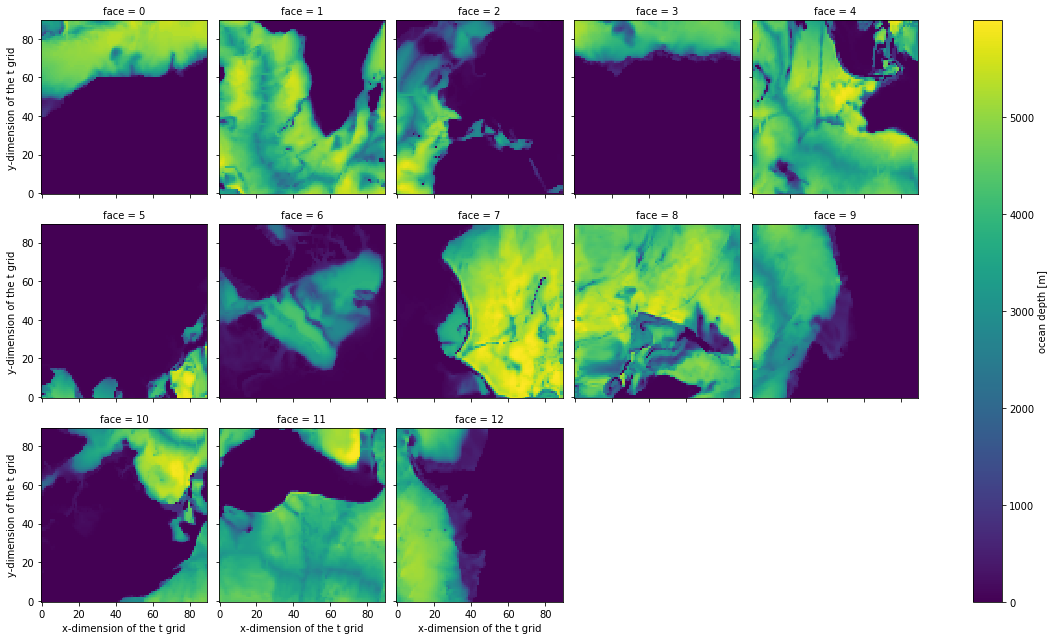

In [45]:
plt.figure(figsize=(14,10))
ecco.Depth.plot(col='face', col_wrap=5)

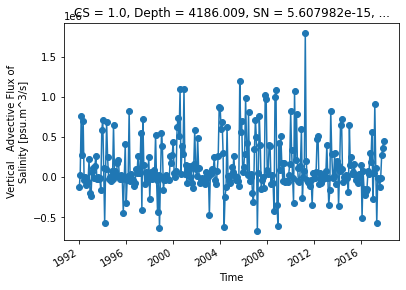

In [46]:
ecco.ADVr_SLT[:,1,1,10,10].plot(marker='o')

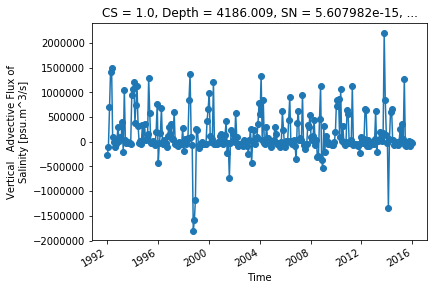

In [47]:
ecco.ADVr_SLT[20,1,1,10,10].values

array(-17289.229, dtype=float32)

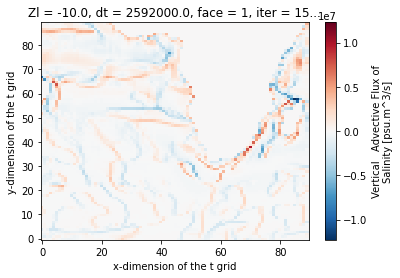

In [48]:
ecco.ADVr_SLT[20,1,1].plot()

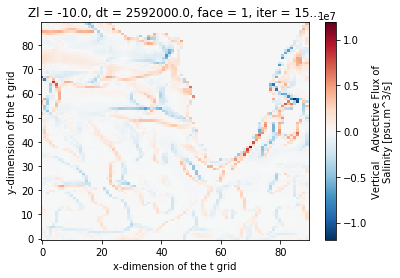

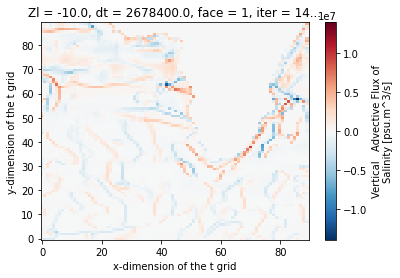

In [49]:
ecco.ADVr_SLT[19,1,1].plot()

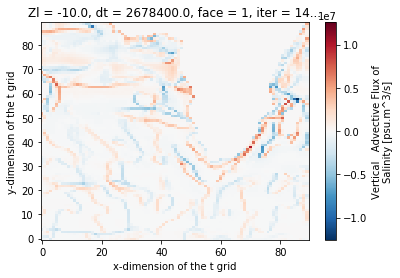